In [133]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

import os, sys, shutil
sys.path.append("..")

from lammpsrun import LAMMPS, Prism
from PBSJobSubmissionScript import PBS_Submitter, qstat_monitor
from utility_scripts import *
import pandas as pd

from ase import Atoms, units
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from ase.io.trajectory import Trajectory
from ase.io import write, read
from ase.build import surface
from ase.spacegroup import crystal, get_spacegroup

cx1_out = r"/rds/general/user/yx6015/home/cx1_out/"
ephemeral = r"/rds/general/user/yx6015/ephemeral/"
sim_path = r"/rds/general/user/yx6015/home/LAMMPS_Simulation/HPC_Jupyter/"
potential = "fe_o_water_fe_o_c_5050_water.reax"
print(cx1_out + '\n' + sim_path)

/rds/general/user/yx6015/home/cx1_out/
/rds/general/user/yx6015/home/LAMMPS_Simulation/HPC_Jupyter/


In [3]:
# Using data from Ehsan
siderite = crystal(symbols = ['Fe', 'C', 'O'],
                    basis = [(0, 0, 0), 
                             (0, 0, 0.25),
                             (0.2741, 0, 0.25)],
                    spacegroup=167,
                    cellpar=[4.676, 4.676, 15.31, 90, 90, 120])

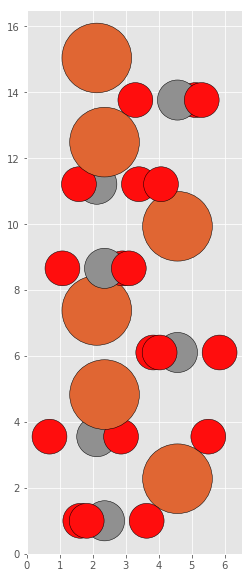

In [4]:
plt.figure(figsize=(18, 10))
plot_atoms(siderite, radii=0.8, rotation=('90x,5y,0z'))
#write("co2_hydration/CO2_solvation.extxyz", CO2_solvation, format = "extxyz")
plt.show()

# Calculating siderite surfaces

In [10]:
# Assuming that the surfaces are identical for 
# structures that are identically labelled
ss_all_names = []

working_dir = os.path.join(sim_path, 'siderite', 'surfaces')
slab_set_files = [x for x in os.listdir(working_dir) if x.endswith('extxyz') and x.startswith('surface')]
slab_set_files_path = [os.path.join(working_dir, x) for x in slab_set_files]
slab_set_files = [x[7:-7] for x in slab_set_files]

for job_name, slab_file in zip(slab_set_files, slab_set_files_path):
    ss_all_names.append(job_name)

    slab_atoms = read(slab_file, format='extxyz')
    slab_calc = reaxff_params_generator(slab_atoms, job_name, write_input=True,
                                        input_fd=os.path.join(sim_path, 'siderite', 'surfaces'),
                                        minimize=["1e-25 1e-25 10000 10000"]*100,
                                        timestep=0.1,
                                        fix=["qeq_reaxc all qeq/reax 1 0.0 10.0 1e-6 reax/c"],
                                        potential=potential)    

ss_input = ["{0}.lammpsin".format(x) for x in ss_all_names]
ss_commands = ["mpiexec lmp_intel_cpu_intelmpi -sf omp -pk omp 4 -in {0} -screen none\n".format(x) for x in ss_input]
ss_source_files = [['$HOME/LAMMPS_Simulation/potentials/{0}'.format(potential),
                    '$PBS_O_WORKDIR/'+x+".lammps*"] for x in ss_all_names]

In [ ]:
import time
num_per_batch = 30

ss_all_out = []
ss_all_err = []

for hour in range(len(ss_input)//num_per_batch+1):
    # 2 hours delay
    seconds = 2*3600
    # no sleep on first run
    if hour != 0:
        time.sleep(seconds)
        
    ss_PBS = PBS_Submitter(job_names=ss_all_names[num_per_batch*hour:num_per_batch*(hour+1)],
                           job_commands=ss_commands[num_per_batch*hour:num_per_batch*(hour+1)],
                           modules=["mpi", "lammps/11Aug17", "intel-suite/2017"],
                           walltime="24:00:00",
                           proc_nodes=1,
                           proc_cpus=8,
                           proc_mpiprocs=2,
                           proc_threads=4,
                           memory=32,
                           source_files=ss_source_files[num_per_batch*hour:num_per_batch*(hour+1)])

    curr_dir = os.getcwd()
    
    os.chdir(working_dir)
    ss_out, ss_err = ss_PBS.run()
    os.chdir(curr_dir)
    
    ss_all_out.extend(ss_out)
    ss_all_err.extend(ss_err)
    
ss_all_out

In [15]:
ss_all_out

['2426497.cx1',
 '2426498.cx1',
 '2426499.cx1',
 '2426500.cx1',
 '2426501.cx1',
 '2426502.cx1',
 '2426503.cx1',
 '2426504.cx1',
 '2426505.cx1',
 '2426506.cx1',
 '2426507.cx1',
 '2426508.cx1',
 '2426509.cx1',
 '2426510.cx1',
 '2426511.cx1',
 '2426512.cx1',
 '2426513.cx1',
 '2426514.cx1',
 '2426515.cx1',
 '2426516.cx1',
 '2426517.cx1',
 '2426518.cx1',
 '2426519.cx1',
 '2426520.cx1',
 '2426521.cx1',
 '2426522.cx1',
 '2426523.cx1',
 '2426524.cx1',
 '2426525.cx1',
 '2426526.cx1',
 '2427104.cx1',
 '2427105.cx1',
 '2427106.cx1',
 '2427107.cx1',
 '2427108.cx1',
 '2427109.cx1',
 '2427110.cx1',
 '2427111.cx1',
 '2427112.cx1',
 '2427113.cx1',
 '2427114.cx1',
 '2427115.cx1',
 '2427116.cx1',
 '2427117.cx1',
 '2427118.cx1',
 '2427119.cx1',
 '2427120.cx1',
 '2427121.cx1',
 '2427122.cx1',
 '2427123.cx1',
 '2427124.cx1',
 '2427125.cx1',
 '2427126.cx1',
 '2427127.cx1',
 '2427128.cx1',
 '2427129.cx1',
 '2427130.cx1',
 '2427131.cx1',
 '2427132.cx1',
 '2427133.cx1',
 '2427563.cx1',
 '2427564.cx1',
 '242756

In [17]:
# Move all the log and error files over

for outfile, job_out in zip(ss_all_names, ss_all_out):
    !mv {sim_path}siderite/surfaces/{outfile}.err {ephemeral}{job_out}/
    !mv {sim_path}siderite/surfaces/{outfile}.log {ephemeral}{job_out}/

In [18]:
# Checking which runs have completed
ss_valid_names = ss_all_names.copy()
ss_valid_out = ss_all_out.copy()

for outfile, job_out in zip(ss_all_names, ss_all_out):
    err_file_name = os.path.join(ephemeral, job_out, outfile + ".err")
    if os.path.isfile(err_file_name):
        err_file_size = os.path.getsize(err_file_name)
        if err_file_size > 0:
            print(outfile, job_out, ': Terminated with errors')
            ss_valid_names.pop(ss_valid_names.index(outfile))
            ss_valid_out.pop(ss_valid_out.index(job_out))
            
    else:
        print(outfile, job_out, ': File not found')
        ss_valid_names.pop(ss_valid_names.index(outfile))
        ss_valid_out.pop(ss_valid_out.index(job_out))

012_NS_L46 2426501.cx1 : Terminated with errors
110_NS_L136 2426502.cx1 : Terminated with errors
100_S_L251 2426504.cx1 : Terminated with errors
012_NS_L98 2426524.cx1 : Terminated with errors
012_S_L62 2427115.cx1 : Terminated with errors
110_NS_L121 2427117.cx1 : Terminated with errors
110_NS_L61 2427129.cx1 : Terminated with errors
012_S_L102 2427563.cx1 : Terminated with errors
110_S_L64 2427590.cx1 : Terminated with errors


In [69]:
import pandas as pd
dump_column_names = ['step', 'temp', 'press', 'cpu', 'pxx', 'pyy', 'pzz', 'pxy', 'pxz', 'pyz', 'ke', 'pe', 'etotal', 'vol', 'lx', 'ly', 'lz', 'atoms']
new_column_names = ['surface', 'stoichiometry', 'jobID', 'fileName', 'layers']
ss_all_df = pd.DataFrame(columns=dump_column_names + new_column_names)

for name, out in zip(ss_valid_names, ss_valid_out):
    new_data = dict.fromkeys(new_column_names)
    file_data = name.split('_')
    new_data['surface'] = file_data[0]
    new_data['jobID'] = out
    new_data['fileName'] = name
    new_data['layers'] = int(file_data[-1][1:])
    if len(file_data) == 2:
        new_data['stoichiometry'] = 'NA'
    elif 'N' in file_data[1]:
        new_data['stoichiometry'] = False
    elif 'S' in file_data[1]:
        new_data['stoichiometry'] = True
    else:
        new_data['stoichiometry'] = 'NA'

    log_reader = LAMMPS()
    log_path = os.path.join(ephemeral, out, 'log.lammps')
    if os.path.isfile(log_path):
        log_reader.read_lammps_log(lammps_log=log_path)
        init_data = log_reader.thermo_content[0]
        init_data['step'] = 'initial'
        final_data = log_reader.thermo_content[-1]
        final_data['step'] = 'final'

        ss_all_df = ss_all_df.append({**new_data, **init_data}, ignore_index=True)
        ss_all_df = ss_all_df.append({**new_data, **final_data}, ignore_index=True)

In [70]:
ss_all_df_grouped = ss_all_df.groupby(by=['surface', "stoichiometry"])

In [86]:
final_stoic_df

,step,temp,press,cpu,pxx,pyy,pzz,pxy,pxz,pyz,...,lx,ly,lz,atoms,surface,stoichiometry,jobID,fileName,layers,area
51,final,0.0,1.497120e+07,4.519103,2.757521e+07,6.973987e+06,1.036441e+07,-1.474533e+07,-1.719001e+07,8.867238e+06,...,6.090805,7.127042,84.434361,170.0,110,True,2426526.cx1,110_S_L84,84,43.409425
57,final,0.0,3.765716e+08,3.931878,1.241801e+09,-1.067326e+08,-5.353292e+06,9.095782e+07,4.123160e+08,4.102646e+07,...,6.090805,7.127042,77.588332,140.0,110,True,2427106.cx1,110_S_L69,69,43.409425
67,final,0.0,4.370354e+08,1.648377,2.861290e+08,1.020873e+09,4.104487e+06,-6.840373e+08,2.370501e+08,-4.239619e+08,...,5.924536,7.177306,90.634908,190.0,110,True,2427111.cx1,110_S_L94,94,42.522207
91,final,0.0,3.016254e+07,7.412017,5.671346e+07,4.132385e+06,2.964178e+07,-3.280083e+07,5.074072e+07,-2.428706e+07,...,6.090805,7.127042,93.562400,210.0,110,True,2427125.cx1,110_S_L104,104,43.409425
99,final,0.0,4.409668e+08,4.443040,3.738307e+08,9.615104e+08,-1.244054e+07,-7.473698e+08,-2.561965e+08,4.021500e+08,...,6.090805,7.127042,95.844410,220.0,110,True,2427130.cx1,110_S_L109,109,43.409425
109,final,0.0,6.517464e+08,3.749873,7.051294e+08,1.461086e+09,-2.109762e+08,-1.269851e+09,2.822466e+08,-4.041206e+08,...,6.090805,7.127042,109.536470,280.0,110,True,2427565.cx1,110_S_L139,139,43.409425
131,final,0.0,4.450328e+08,7.442587,7.489517e+08,4.676657e+07,5.393800e+08,-4.595244e+08,7.814952e+08,-3.825581e+08,...,6.090805,7.127042,102.690440,250.0,110,True,2427576.cx1,110_S_L124,124,43.409425
137,final,0.0,1.892254e+09,4.246127,3.053221e+09,1.165212e+08,2.507021e+09,-1.859111e+09,-3.401046e+09,1.646969e+09,...,6.090805,7.127042,91.280390,200.0,110,True,2427579.cx1,110_S_L99,99,43.409425
193,final,0.0,5.789931e+08,3.261544,1.940366e+09,-1.743040e+08,-2.908266e+07,1.234251e+08,6.144914e+08,5.482334e+07,...,6.090805,7.127042,111.818480,290.0,110,True,2428067.cx1,110_S_L144,144,43.409425
205,final,0.0,2.889053e+08,3.546907,2.363742e+08,6.507098e+08,-2.036812e+07,-5.017366e+08,1.716177e+08,-2.757522e+08,...,6.090805,7.127042,104.972450,260.0,110,True,2428073.cx1,110_S_L129,129,43.409425


Using Hao-Yeh's example:

$$ E_s=\frac{E_{slab}^{n}-n(E_{slab}^{n}-E_{slab}^{n-1})} {2A} $$


In [198]:
initial_stoic_df.Es.mean() * units.kcal/units.mol * units.J / (units.m)**2

1.1255627821039458

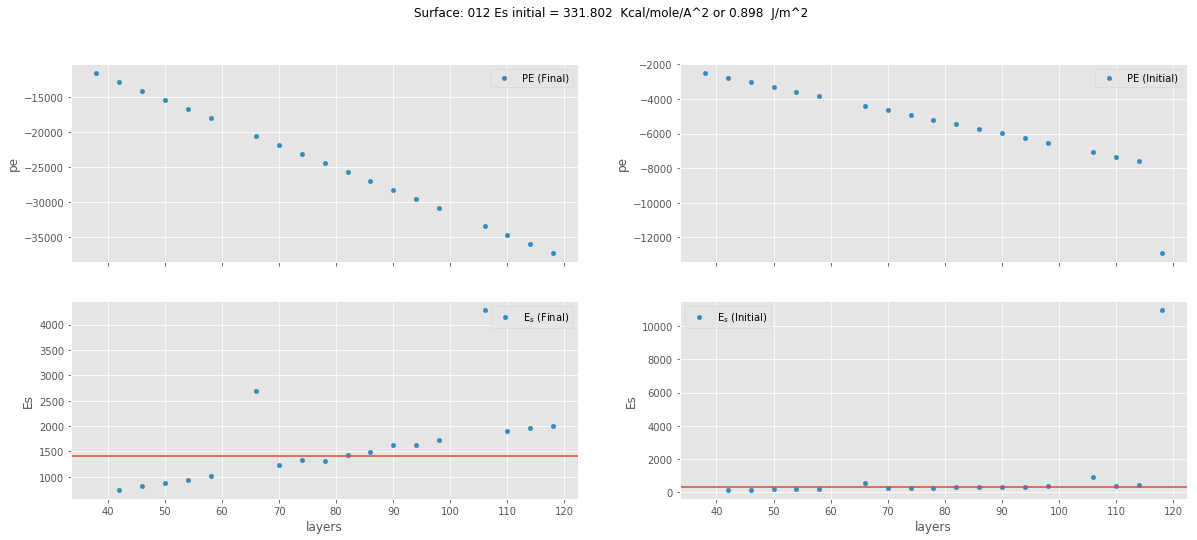

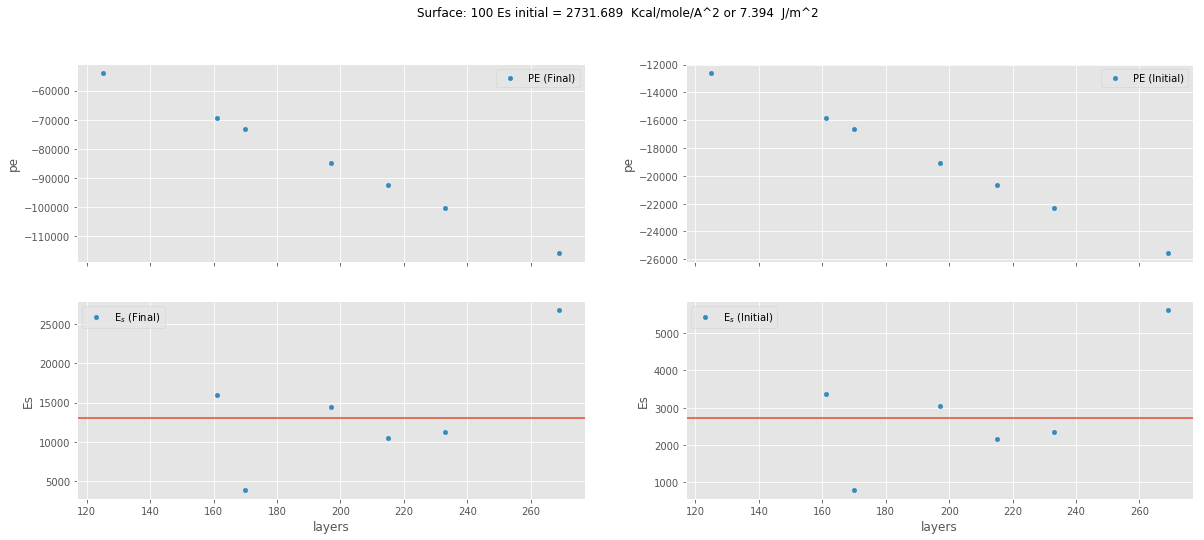

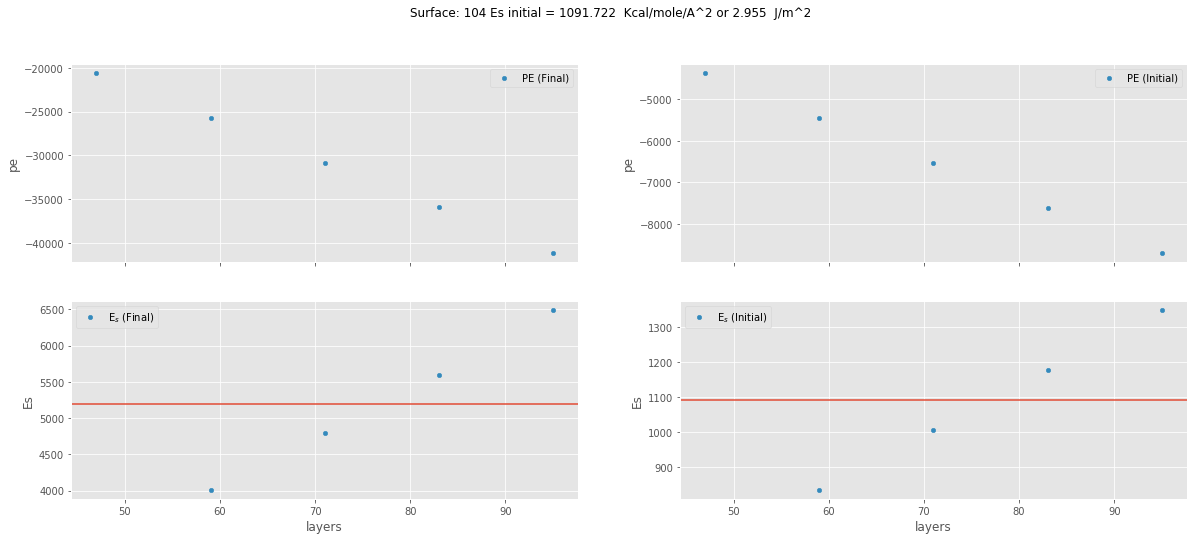

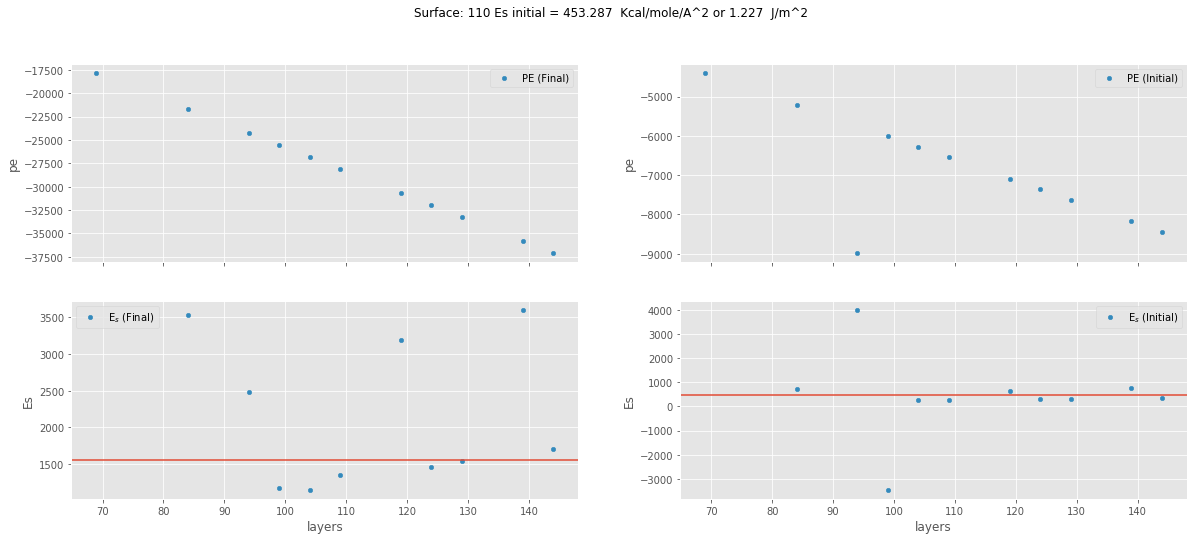

In [200]:
for label, df in ss_all_df_grouped:
    surface = label[0]
    stoichiometry = label[1]
    
    initial_df = df.loc[df.step == 'initial']
    final_df = df.loc[df.step == 'final']
    
    initial_stoic_df = initial_df.loc[initial_df.stoichiometry == True].copy().sort_values('layers').reset_index(drop=True)
    final_stoic_df = final_df.loc[final_df.stoichiometry == True].copy().sort_values('layers').reset_index(drop=True)
    
    initial_stoic_df.layers = pd.to_numeric(initial_stoic_df.layers)
    final_stoic_df.layers = pd.to_numeric(final_stoic_df.layers)
    
    
    initial_stoic_df['area'] = initial_stoic_df.lx * initial_stoic_df.ly
    final_stoic_df['area'] = final_stoic_df.lx * final_stoic_df.ly
    
    initial_stoic_df['Es'] = (initial_stoic_df.pe - initial_stoic_df.pe.diff() * initial_stoic_df.layers) / (2*initial_stoic_df.area.mean())
    final_stoic_df['Es'] = (final_stoic_df.pe - final_stoic_df.pe.diff() * final_stoic_df.layers) / (2*final_stoic_df.area.mean())
        
    if (len(final_stoic_df.layers)) > 0:
        f, ((ax00, ax01), (ax10, ax11)) = plt.subplots(2, 2, figsize=(20, 8), sharex=True)
        final_stoic_df.plot.scatter(x='layers', y='pe', ax = ax00, label='PE (Final)')
        initial_stoic_df.plot.scatter(x='layers', y='pe', ax = ax01, label='PE (Initial)')

        final_stoic_df.plot.scatter(x='layers', y='Es', ax = ax10, label='E$_s$ (Final)')
        initial_stoic_df.plot.scatter(x='layers', y='Es', ax = ax11, label='E$_s$ (Initial)')
        
        Es_mean_init = initial_stoic_df.Es[abs(initial_stoic_df.Es - initial_stoic_df.Es.mean()) < initial_stoic_df.Es.std()].mean()
        Es_mean_final = final_stoic_df.Es[abs(final_stoic_df.Es - final_stoic_df.Es.mean()) < final_stoic_df.Es.std()].mean()
        ax10.axhline(Es_mean_final)
        ax11.axhline(Es_mean_init)
        
        # convert units
        Es_mean_init_Jm2 = Es_mean_init * units.kcal/units.mol * units.J / (units.m)**2
        
        f.suptitle('Surface: ' + final_stoic_df.surface[0] + " Es initial = {:.3f}  Kcal/mole/A^2".format(Es_mean_init) + " or {:.3f}  J/m^2".format(Es_mean_init_Jm2))
        #f.tight_layout()
        f.show()

In [22]:
ss_compiled_df = pd.DataFrame(columns=['pe_per_atomarea_initial', 'pe_per_atomarea_final',
                                       'surface', 'stoichiometry', 'jobID', 'fileName', 'layers', 'atoms'])
ss_all_df_grouped = ss_all_df.groupby(by=['surface', "stoichiometry", 'layers'])

for i in ss_all_df_grouped.groups:
    cur_df = ss_all_df_grouped.get_group(i).groupby(by='step')
    initial_group = cur_df.get_group('initial')
    final_group = cur_df.get_group('final')
    
    final_cell_area = final_group['vol'].mean() / final_group['lz'].mean()
    init_cell_area = initial_group['vol'].mean() / initial_group['lz'].mean()
    
    init_pe_per_atom = initial_group['pe'].mean()/initial_group['atoms'].mean() - np.mean(pe_all) # this is the excess energy per atom
    final_pe_per_atom = final_group['pe'].mean()/final_group['atoms'].mean() - np.mean(pe_all) # same here
    
    new_df = new_df.append(initial_group[['surface', 'stoichiometry', 'jobID', 'fileName', 'layers', 'atoms']].iloc[0].copy(),
                           sort=False,
                           ignore_index=True)
    new_df.loc[new_df.index[-1], 'pe_per_atomarea_initial'] = init_pe_per_atom/init_cell_area
    new_df.loc[new_df.index[-1], 'pe_per_atomarea_final'] = final_pe_per_atom/final_cell_area

NameError: name 'pe_all' is not defined

In [84]:
new_df.head()

,pe_per_atomarea_initial,pe_per_atomarea_final,surface,stoichiometry,jobID,fileName,layers,atoms
0,0.640380,-0.004157,1,False,2205118.cx1,001_NS_L118,118,299.0
1,0.640843,-0.003938,1,False,2206039.cx1,001_NS_L130,130,329.0
2,0.641228,-0.003771,1,False,2203641.cx1,001_NS_L142,142,359.0
3,0.641834,-0.003521,1,False,2205091.cx1,001_NS_L166,166,419.0
4,0.642076,-0.003415,1,False,2205100.cx1,001_NS_L178,178,449.0


In [75]:
stoichiometric_surfaces = new_df.groupby(by='stoichiometry').get_group(True)

In [80]:
stoichiometric_surfaces

,pe_per_atomarea_initial,pe_per_atomarea_final,surface,stoichiometry,jobID,fileName,layers,atoms
34,-3.538237,-4.109517,12,True,2205114.cx1,012_S_L38,38,90.0
35,-3.539985,-4.083507,12,True,2206053.cx1,012_S_L42,42,100.0
36,-3.541413,-4.076472,12,True,2206057.cx1,012_S_L46,46,110.0
37,-3.542601,-4.092770,12,True,2205112.cx1,012_S_L50,50,120.0
38,-3.543604,-4.072601,12,True,2205085.cx1,012_S_L54,54,130.0
39,-3.544464,-4.065079,12,True,2203656.cx1,012_S_L58,58,140.0
40,-3.545208,-4.051922,12,True,2203670.cx1,012_S_L62,62,150.0
41,-3.545858,-4.058926,12,True,2206040.cx1,012_S_L66,66,160.0
42,-3.546431,-4.056013,12,True,2206049.cx1,012_S_L70,70,170.0
43,-3.546941,-3.994460,12,True,2206048.cx1,012_S_L74,74,180.0


## Thickness Convergence Test

Using the following equation and form:

$$
E_s = \frac{E^n_{slab} - n(E^n_{slab} - E^{n-1}_{slab})}{2A}
$$

While the thickness of slab reaches an adequate value, where the central atom positions are fixed,
$(E^n_{slab} - E^{n-1}_{slab})$ should converge to $𝐸_{bulk}$

In [53]:
siderite_thickness = arange(1, 11)
siderite_thickness_input = ["siderite_opt104_l{0}_reaxff_minimize.in".format(x) for x in siderite_thickness]
siderite_thickness_commands = ["mpiexec lmp_mpi -in {0} -screen none\n".format(x) for x in siderite_thickness_input]
siderite_thickness_names = ["siderite_opt104_l{0}".format(x) for x in siderite_thickness]
siderite_thickness_calc = LAMMPS(parameters = siderite_slab_reaxff_params,
                                 no_data_file=True, always_triclinic=True)

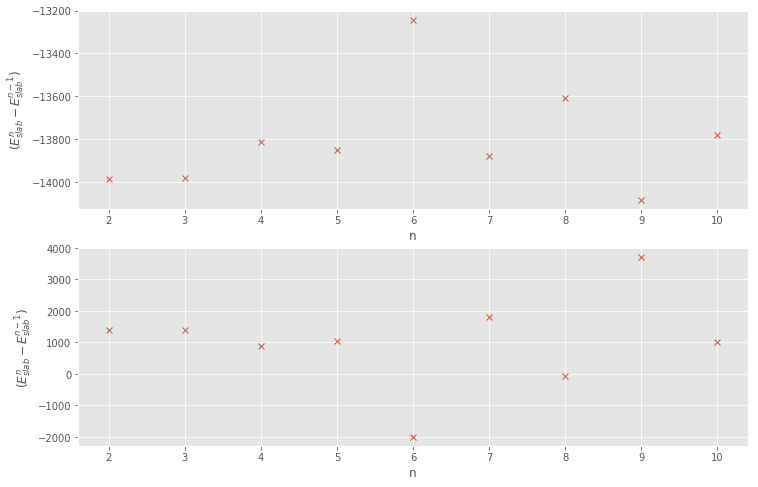

In [51]:
opt_pe_arr = array(opt_pe)
se_arr = opt_pe_arr[1:] - array(siderite_thickness[1:]) * (opt_pe_arr[1:] - opt_pe_arr[:-1])

style.use('ggplot')
figure(figsize=(12, 8))

subplot(2, 1, 1)
plot(siderite_thickness[1:], opt_pe_arr[1:] - opt_pe_arr[:-1], ' x')
xlabel("n")
ylabel("$(E^n_{slab} - E^{n-1}_{slab})$")

subplot(2, 1, 2)
plot(siderite_thickness[1:23], se_arr[:22], ' x')
xlabel("n")
ylabel("$(E^n_{slab} - E^{n-1}_{slab})$")

show()